In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/SVM

/content/drive/MyDrive/SVM


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

X=iris['data'][:,(2,3)]
Y = iris['target']

idx = (Y==0) + (Y==1)
X = X[idx]
Y = Y[idx]

In [5]:
from sklearn.svm import SVC
svm_clf = SVC(kernel ='linear')
svm_clf.fit(X,Y)
print (svm_clf.coef_, '\t', svm_clf.intercept_)

[[1.1 0.7]] 	 [-3.27999997]


In [6]:
print (svm_clf.support_vectors_)

[[1.9 0.4]
 [3.  1.1]]


In [7]:
def plot_decision_boundary(w,b,xmin,xmax):
  x = np.linspace(xmin,xmax,100)
  db = - w[0] / w[1] *x - b /w[1]

  margin = 1 / w[1]
  up = db +margin
  down = db - margin

  plt.plot(x, db, color = 'black')
  plt.plot(x, up, "--", color = 'black')
  plt.plot(x, down, "--", color = 'black')


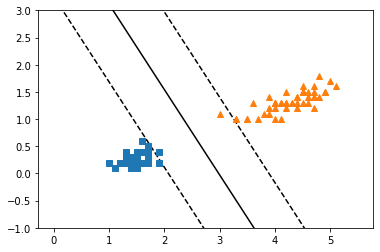

In [8]:
plt.figure(figsize=(6,4))

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

plot_decision_boundary(w,b,0,5.5)

plt.plot(X[:,0][Y==0], X[:,1][Y==0],'s')
plt.plot(X[:,0][Y==1], X[:,1][Y==1],'^')
plt.ylim(-1,3)

plt.show()



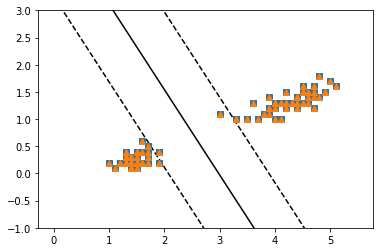

In [9]:
plt.figure(figsize=(6,4))

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

plot_decision_boundary(w,b,0,5.5)

plt.plot(X[:,0], X[:,1],'s')
plt.plot(X[:,0], X[:,1],'^')
plt.ylim(-1,3)

plt.show()



In [10]:
iris = datasets.load_iris()

x = iris["data"][:,(2,3)]
y = (iris["target"]==2)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import LinearSVC


In [18]:
svm_clf = Pipeline([('scaler',StandardScaler()),('svc',LinearSVC(C=1))])

svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=1))])

In [19]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1)
svm_clf2 = LinearSVC(C=100)

pip_svm_clf1 = Pipeline([('scaler',scaler),('svc', svm_clf1)])
pip_svm_clf2 = Pipeline([('scaler',scaler),('svc', svm_clf2)])

pip_svm_clf1.fit(x,y)
pip_svm_clf2.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=100))])

In [24]:
scaler.mean_, scaler.scale_

(array([3.758     , 1.19933333]), array([1.75940407, 0.75969263]))

In [27]:
m = scaler.mean_
s = scaler.scale_

z0 = (x[:,0] - m[0])/s[0]
z1 = (x[:,1] - m[1]) /s[1]

In [40]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

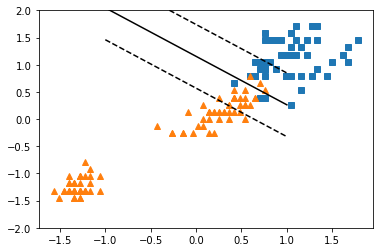

In [33]:
plt.figure(figsize=(6,4))

plt.plot(z0[y==1], z1[y==1],"s")
plt.plot(z0[y==0], z1[y==0],"^")

w = svm_clf1.coef_[0]
b = svm_clf1.intercept_[0]

plot_decision_boundary(w,b,-1,1)
plt.ylim(-2,2)
plt.show()


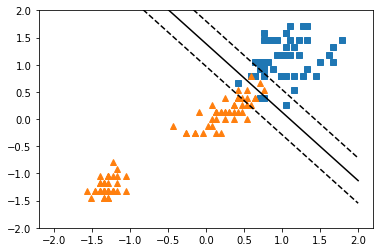

In [42]:
plt.figure(figsize=(6,4))

plt.plot(z0[y==1], z1[y==1],"s")
plt.plot(z0[y==0], z1[y==0],"^")

w = svm_clf2.coef_[0]
b = svm_clf2.intercept_[0]

plot_decision_boundary(w,b,-2,2)
plt.ylim(-2,2)
plt.show()


In [51]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1)
X.shape, y.shape

((1000, 2), (1000,))

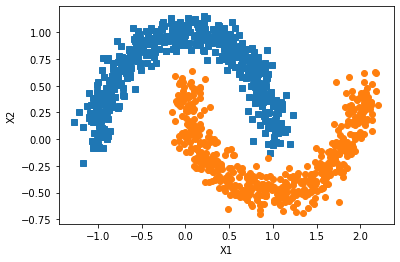

In [52]:
def plot_dataset(X,y):
  plt.plot(X[:,0][y==0],X[:,1][y==0], 's')
  plt.plot(X[:,0][y==1],X[:,1][y==1], 'o')

  plt.xlabel('X1')
  plt.ylabel('X2')

plot_dataset(X,y)


In [54]:
from sklearn.svm import SVC

poly3_svm_clf = Pipeline([('scale',StandardScaler()),('svc',SVC(kernel='poly', degree=3, coef0=10,C=5))])

poly3_svm_clf.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, kernel='poly'))])

In [55]:
poly10_svm_clf = Pipeline([('scale',StandardScaler()),('svc',SVC(kernel='poly', degree=10, coef0=10,C=5))])

poly3_svm_clf.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, kernel='poly'))])

In [57]:
def plot_predictions(clf):
  x0 = np.linspace(-3,3,100)
  x1 = np.linspace(-3,3,100)
  x0, x1 = np.meshgrid(x0,x1)
  X =np.c_[x0.ravel(), x1.ravel()]

  y_pred = clf.predict(X)
  y_pred = y_pred.reshape(x0.shape)
  plt.contourf(x0,x1, y_pred, alpha=0.1)


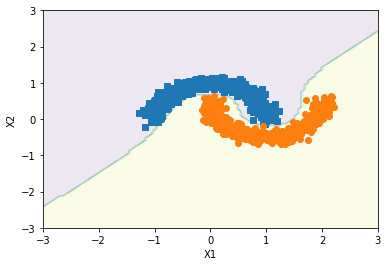

In [58]:
plt.figure(figsize=(6,4))

plot_predictions(poly3_svm_clf)
plot_dataset(X,y)
plt.show()

In [59]:
rbf_svm_clf = Pipeline([('scale',StandardScaler()),('svc',SVC(kernel='rbf', gamma=5,coef0=10,C=5))])

rbf_svm_clf.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, gamma=5))])

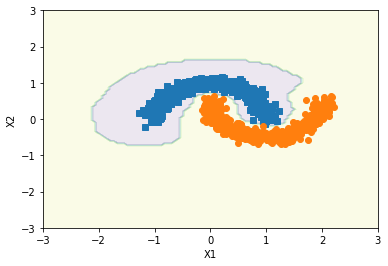

In [60]:
plt.figure(figsize=(6,4))

plot_predictions(rbf_svm_clf)
plot_dataset(X,y)
plt.show()